In [334]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [335]:
# Load Dataset
df = pd.read_csv("/Users/sa18/Desktop/Unsupervised_DJ/train.csv")

## Data Understanding

In [336]:
# shape of Data Frame
df.shape

(28362, 24)

This dataset has 24 columns and 28,362 rows

In [337]:
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.0


In [338]:
# list the columns
df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'sadness', 'feelings', 'topic', 'age'],
      dtype='object')

In [339]:
# check dataframe structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28362 entries, 0 to 28361
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28362 non-null  int64  
 1   artist_name               28362 non-null  object 
 2   track_name                28362 non-null  object 
 3   release_date              28362 non-null  int64  
 4   genre                     28362 non-null  object 
 5   lyrics                    28362 non-null  object 
 6   len                       28362 non-null  int64  
 7   dating                    28362 non-null  float64
 8   violence                  28362 non-null  float64
 9   world/life                28362 non-null  float64
 10  night/time                28362 non-null  float64
 11  shake the audience        28362 non-null  float64
 12  family/gospel             28362 non-null  float64
 13  romantic                  28362 non-null  float64
 14  commun

In [340]:
# check for missing values
df.isnull().sum()

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
sadness                     0
feelings                    0
topic                       0
age                         0
dtype: int64

This dataset has no null values. 

In [341]:
# describe the dataset's info and stats
df.describe()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
count,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000
mean,42948.166878,1990.239652,73.030534,0.021110,0.118371,0.120984,0.057356,0.017418,0.017045,0.048676,0.076651,0.097185,0.060067,0.047417,0.049008,0.024155,0.129402,0.030995,0.425148
std,24747.811462,18.486997,41.831605,0.052366,0.178658,0.172216,0.111892,0.040658,0.041968,0.106071,0.109497,0.181314,0.123346,0.091559,0.089553,0.051032,0.181149,0.071656,0.264100
min,0.000000,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,0.000291,0.000289,0.000289,0.000284,0.000284,0.000284,0.000284,0.000289,0.014286
25%,20393.500000,1975.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,0.001144,0.001053,0.000975,0.000993,0.000993,0.000957,0.001144,0.000993,0.185714
50%,45407.000000,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,0.002632,0.001815,0.001815,0.001645,0.001815,0.001645,0.005263,0.001754,0.414286
75%,64089.500000,2007.000000,93.000000,0.004049,0.192538,0.197854,0.065778,0.009989,0.004785,0.042304,0.132111,0.088799,0.055109,0.054373,0.064302,0.025515,0.235115,0.032617,0.642857
max,82451.000000,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,0.645829,0.992298,0.956938,0.638021,0.667782,0.618073,0.981424,0.958810,1.000000


In [342]:
# check for duplicates
df.duplicated().sum()

0

There are not duplicated items in this dataset. 

In [343]:
# check for unique values in each column
df.nunique()

Unnamed: 0                  28362
artist_name                  5424
track_name                  23680
release_date                   70
genre                           7
lyrics                      28362
len                           199
dating                       6511
violence                    12575
world/life                  14100
night/time                  10575
shake the audience           7213
family/gospel                6725
romantic                     9927
communication               12548
obscene                      9159
music                       10081
movement/places              8388
light/visual perceptions    10066
family/spiritual             8697
sadness                     13984
feelings                     9363
topic                           8
age                            70
dtype: int64

There are 7 types of genres. There are 8 topics.

# Univariate Analysis

In [344]:
# let's look at genres
# get value count for genres

type_counts = df.value_counts("genre")
type_counts.to_frame()

,count
genre,
pop,7038
country,5444
blues,4603
rock,4032
jazz,3844
reggae,2497
hip hop,904


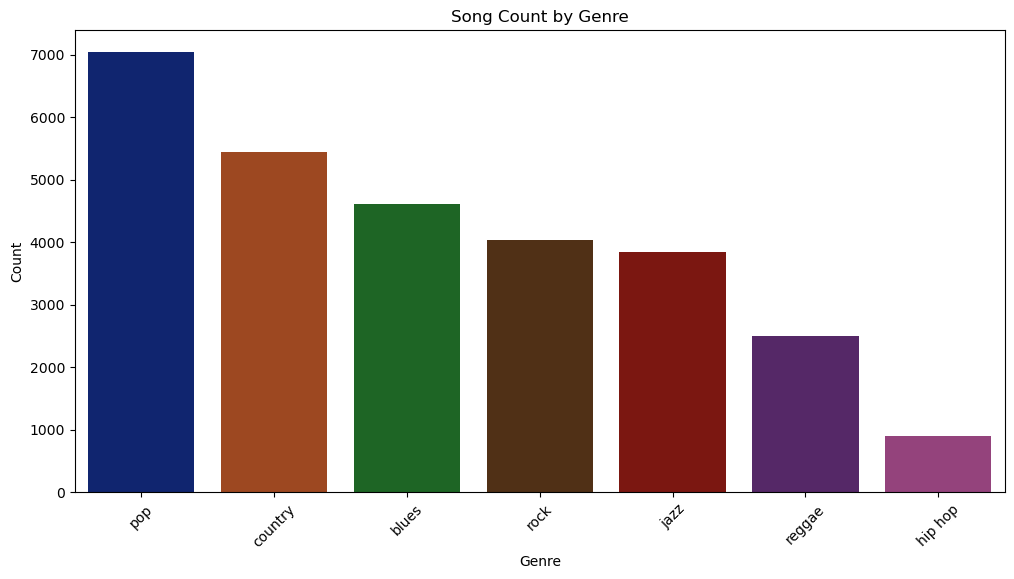

In [345]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index, palette='dark', hue='genre', legend=False)
plt.title("Song Count by Genre")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Genre")
plt.show()

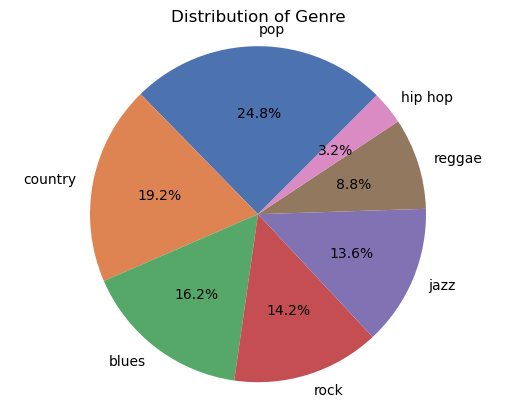

In [346]:
size = [7038, 5444, 4603, 4032, 3844, 2497, 904]
label = ['pop', 'country', 'blues', 'rock', 'jazz', 'reggae', 'hip hop']
explode = [0.05] * 7

# create pie chart
plt.pie(size, labels=label, autopct='%1.1f%%', colors=sns.color_palette("deep"), startangle=45)

plt.title ("Distribution of Genre")
plt.axis('equal')

# display pie chart
plt.show()


In [347]:
# let's group the years songs were released, into decades

# create a new column called "decade", using floor division
df['decade'] = (df['release_date'] // 10) * 10

df['decade'].value_counts()

decade
2010    5631
2000    4779
1980    4674
1990    4454
1970    3950
1960    3407
1950    1467
Name: count, dtype: int64

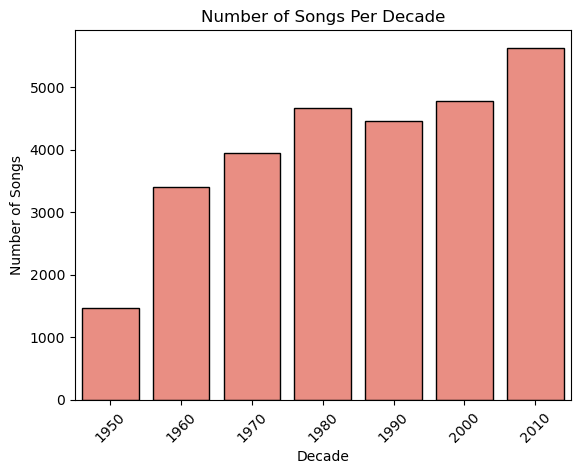

In [348]:
# plot
sns.countplot(data=df, x='decade', color='salmon', edgecolor='black')
plt.title("Number of Songs Per Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Songs")
plt.xticks(rotation=45)
plt.tight_layout
plt.show()

This dataset is composed of songs from the 1950s-2010s. The number of songs increased with each decade. There was a slight dip from the 1980s to the 1990s, but the trend regained footing after 1990s. I'd like to see how the genres and topics evolved across decades. We will dive into these during or bivariate analysis. 

In [349]:
# let's look at topic
# get value count for topic

type_counts = df.value_counts("topic")
type_counts

topic
sadness       6094
violence      5707
world/life    5419
obscene       4881
music         2303
night/time    1823
romantic      1523
feelings       612
Name: count, dtype: int64

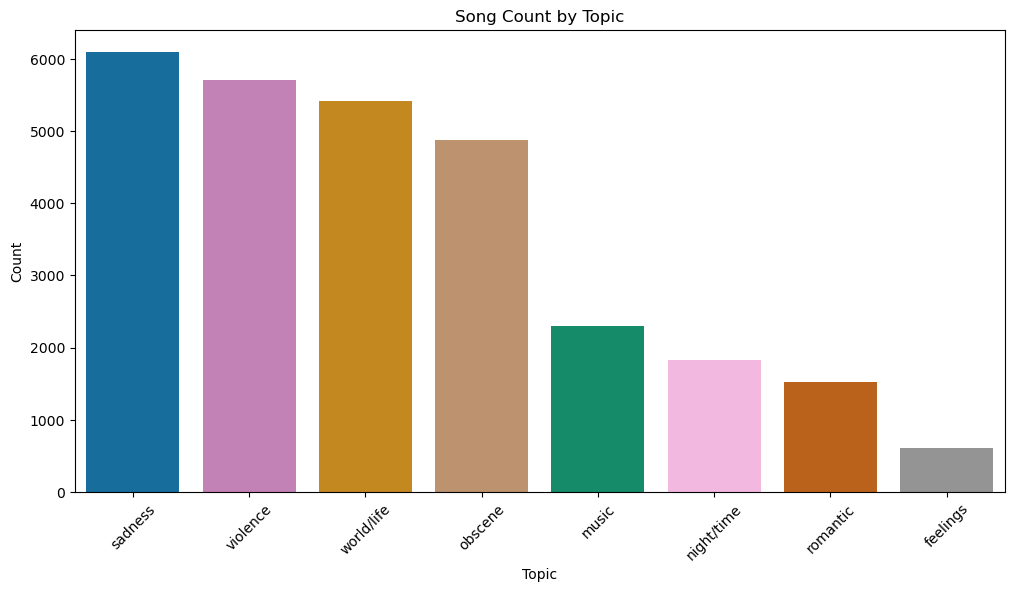

In [350]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='topic', order=df['topic'].value_counts().index, palette='colorblind', hue='topic', legend=False)
plt.title("Song Count by Topic")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Topic")
plt.show()

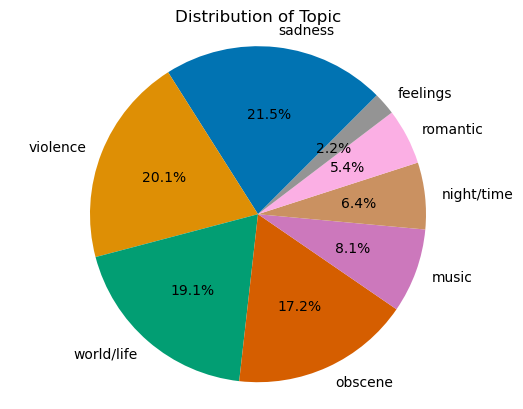

In [351]:
size = [6094, 5707, 5419, 4881, 2303, 1823, 1523, 612]
label = ['sadness', 'violence', 'world/life', 'obscene', 'music', 'night/time', 'romantic', 'feelings']
explode = [0.05] * 7

# create pie chart
plt.pie(size, labels=label, autopct='%1.1f%%', colors=sns.color_palette("colorblind"), startangle=45)

plt.title ("Distribution of Topic")
plt.axis('equal')

# display pie chart
plt.show()

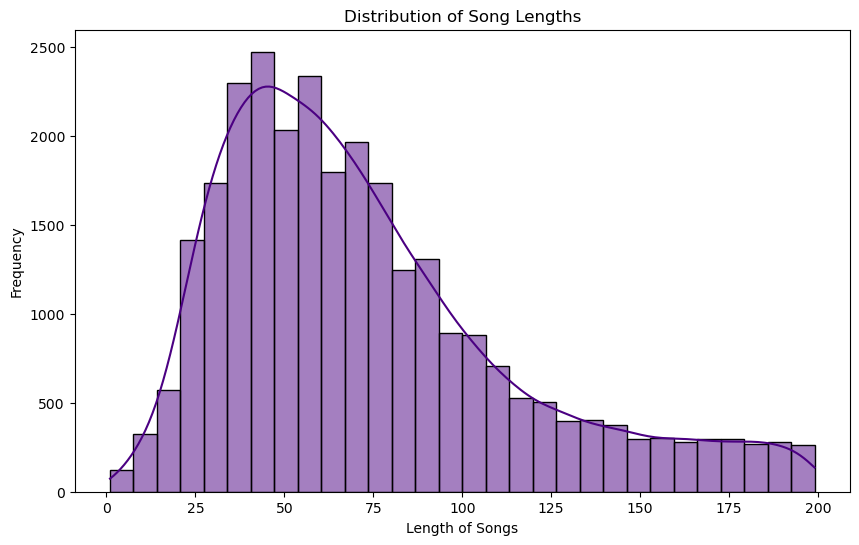

In [352]:
# song length distribution

plt.figure(figsize=(10,6))
sns.histplot(df['len'], bins=30, color="indigo", kde=True)
plt.title("Distribution of Song Lengths")
plt.xlabel("Length of Songs")
plt.ylabel("Frequency")
plt.show()

In [353]:
# age = a score from 0 to 1, expressing how 'old' or current a song is. 1 means oldest, 0 being newest. let's look at age
# get value count for age

type_counts = df.value_counts("age")
type_counts.to_frame()

,count
age,
0.042857,660
0.028571,653
0.071429,617
0.157143,596
0.114286,588
...,...
0.928571,106
0.971429,59
0.985714,58


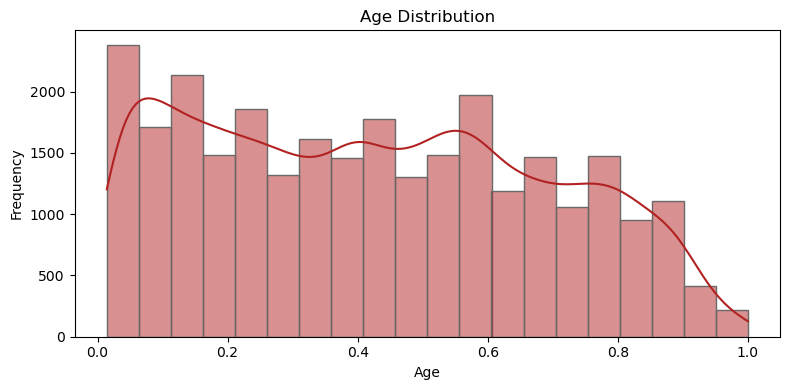

In [354]:
plt.figure(figsize=(8,4))
sns.histplot(df['age'], bins=20, kde=True, color='firebrick', edgecolor='dimgray')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

"age" connotes how old, or current, a song is. 1 means that a song is fairly old and 0 means that a song is fairly new. According to the Age Distribution histogram, the dataset has over 2,000 instances of songs that are slighly over the 0 range. I interpret this to mean that most songs in this database are not entirely new, but they are also not entirely old either. Definingn "old" and "new" would be helpful.

In [355]:
# let's look at release_date
# get value count for release_date

type_counts = df.value_counts("release_date")
type_counts.to_frame()

,count
release_date,
2017,660
2018,653
2015,617
2009,596
2012,588
...,...
1955,106
1952,59
1951,58


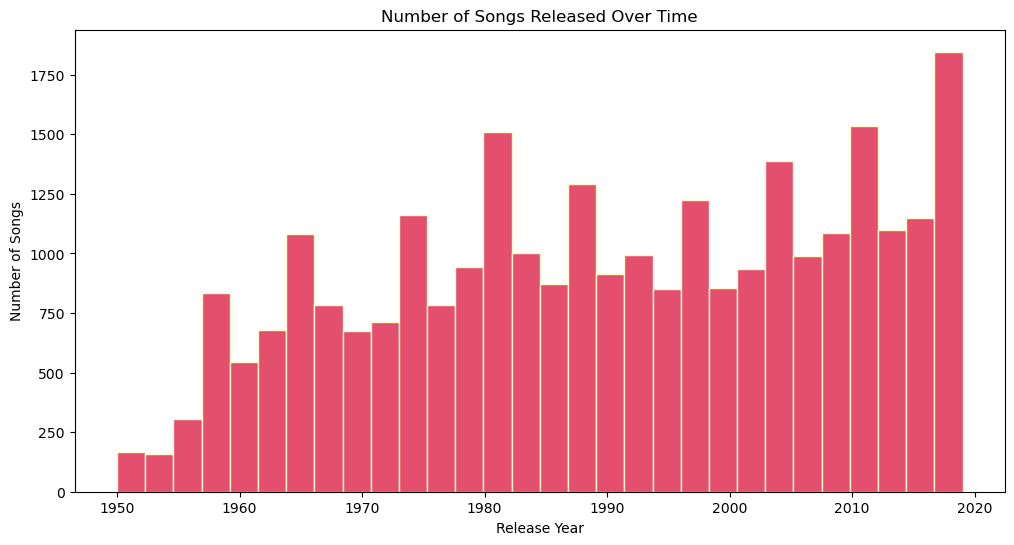

In [356]:
plt.figure(figsize=(12,6))
sns.histplot(df['release_date'], bins=30, kde=False, color='crimson', edgecolor='lemonchiffon')
plt.title("Number of Songs Released Over Time")
plt.xlabel("Release Year")
plt.ylabel("Number of Songs")
plt.show()

/var/folders/7d/lbg415rs1336xg8yjmf1h_3c0000gn/T/ipykernel_1197/3096153317.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='release_date', y = 'len', ci=None, color='violet')


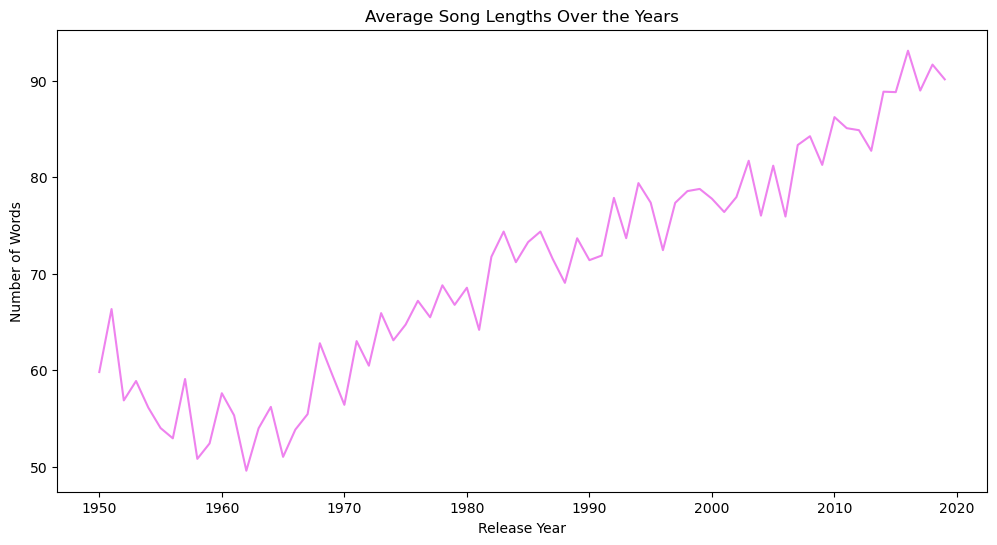

In [357]:
# let's look at the average song length over the years, to see if song lenghts increased, decreased or stayed the same
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='release_date', y = 'len', ci=None, color='violet')
plt.title("Average Song Lengths Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Words")
plt.show()

The average length of a song increased dramatically from the 1950s to 2000s. There was a brief surge in the early part of the 1950s, but that quickly dipped in the same decade. Song lenghts decreased by the 1960s and they remained low until the next decade (the '70s). After the 1970s, song lengths continued to climb, reaching a peak somewhere after 2010 and before 2020. 

# Bivariate Analysis

In [358]:
# let's look at relationship between genre and topic

grouped = df.groupby(['genre', 'topic']).size().reset_index(name='count')
grouped.head(50)


,genre,topic,count
0,blues,feelings,147
1,blues,music,453
2,blues,night/time,355
3,blues,obscene,605
4,blues,romantic,309
5,blues,sadness,893
6,blues,violence,1096
7,blues,world/life,745
8,country,feelings,105
9,country,music,592


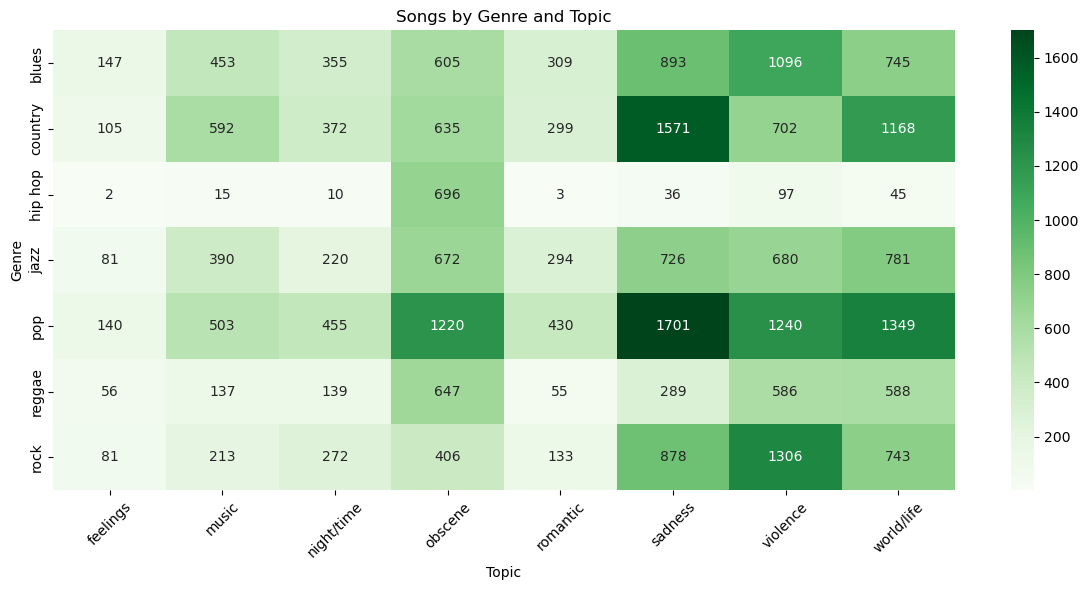

In [359]:
pivot = grouped.pivot(index='genre', columns='topic', values='count').fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='Greens', annot=True, fmt='g')
plt.title("Songs by Genre and Topic")
plt.xlabel('Topic')
plt.ylabel("Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

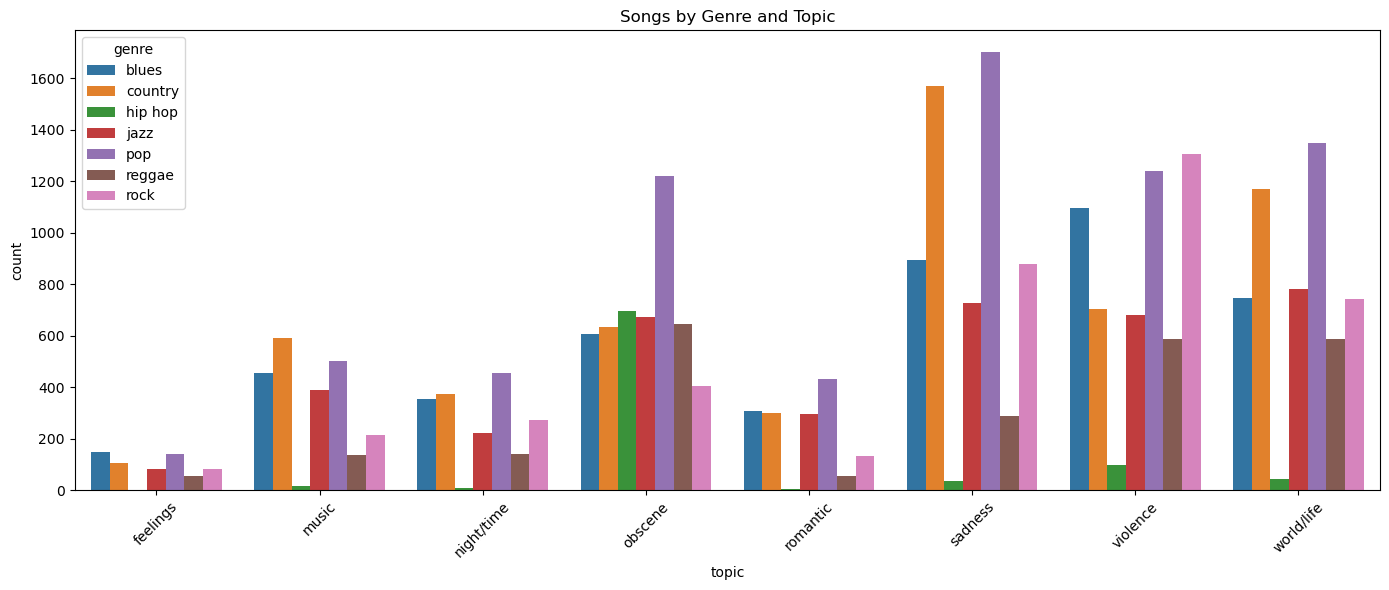

In [360]:
plt.figure(figsize=(14,6))
sns.barplot(data=grouped, x='topic', y='count', hue='genre')
plt.title('Songs by Genre and Topic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Pop Music seems to have the highest counts for obscenity, sadness and violence. Interestingly, Hip Hop's violence count is very low, even though it's obscenity count is moderately high. 

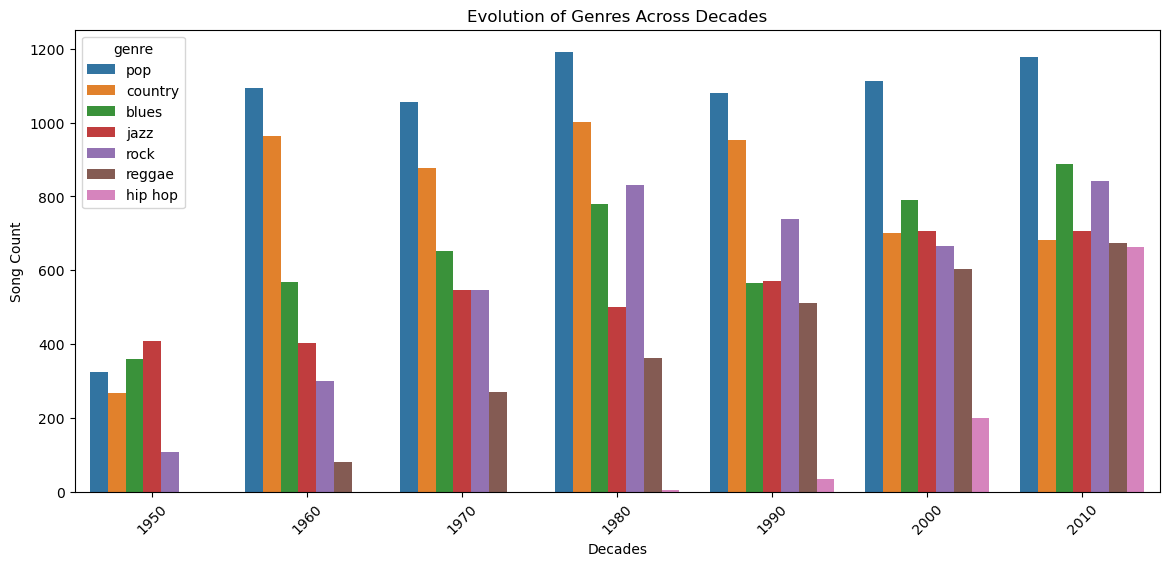

In [361]:
# let's look at the evolution of genres across decades

plt.figure(figsize=(14,6))
sns.countplot(data=df, x='decade', hue='genre')
plt.xlabel("Decades")
plt.ylabel("Song Count")
plt.xticks(rotation=45)
plt.title("Evolution of Genres Across Decades")
plt.tight_layout
plt.show()

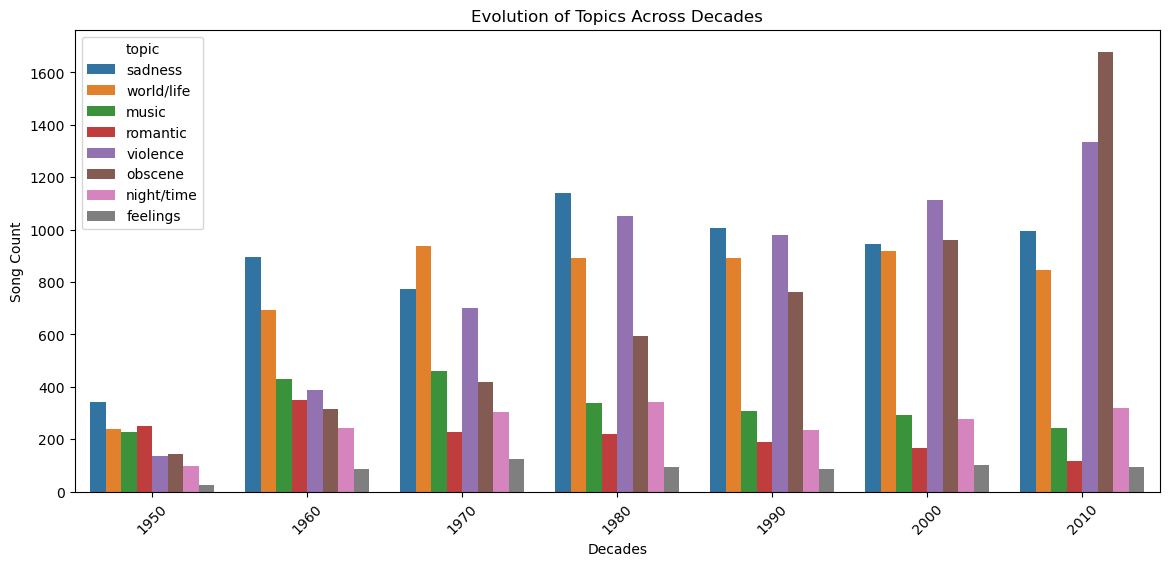

In [362]:
# let's look at the evolution of topics across decades

plt.figure(figsize=(14,6))
sns.countplot(data=df, x='decade', hue='topic')
plt.xlabel("Decades")
plt.ylabel("Song Count")
plt.xticks(rotation=45)
plt.title("Evolution of Topics Across Decades")
plt.tight_layout
plt.show()

In [363]:
# let's look at relationship between sadness and pop

# filter dataset for pop and sadness songs only
sad_pop = df[(df['genre'] == 'pop') & (df['topic'] == 'sadness')]

sad_pop.value_counts()

Unnamed: 0  artist_name                      track_name              release_date  genre  lyrics                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   len  dating    violence  world/life  night/time  shake the audience  family/gospel  romantic  communication  obscene   music     movement/places  light/visual perceptions  family/spiritual  sadness   feelings  topic    age       decade
0           mukesh                           mohabbat bhi jhoothi    1950          pop    hold time feel break feel untrue convince speak

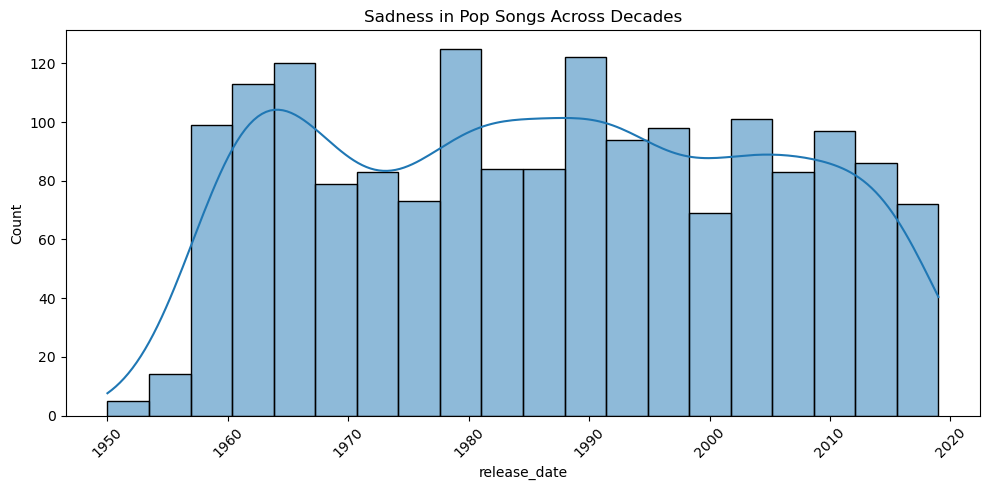

In [364]:
plt.figure(figsize=(10,5))
sns.histplot(data=sad_pop, x='release_date', bins=20, kde=True)
plt.title("Sadness in Pop Songs Across Decades")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Multivariate Analysis

In [ ]:
# is there a relationship between genre, topic and decade?

In [ ]:
# is there a relationship between obscenity, violence and sadness? 